In [1]:
import os
from glob import glob

import xarray as xr

In [4]:
case = 'g.bforced.ctrl.e21.BHIST.f09_g17.CMIP6-historical.011.001'
diro = f'/glade/scratch/mclong/{case}/run'
files = sorted(glob(f'{diro}/{case}.pop.h.nday1.*'))

ds_sr = xr.open_mfdataset(files)
ds_sr

<xarray.Dataset>
Dimensions:                 (time: 915, d2: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, nlat: 384, nlon: 320)
Coordinates:
  * time                    (time) object 1850-01-02 00:00:00 ... 1852-07-05 ...
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/56)
    time_bound              (time, d2) object dask.array<chunksize=(31, 2), meta=np.ndarray>
    dz                      (time, z_t) float32 dask.array<chunksize=(31, 60), meta=np.ndarray>
    dzw                     (time, z_w) float32 dask.array<chunksize=(31, 60), meta=np.ndarray>
    KMT                     (time, nlat, nlon) float64 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    KMU                     (time, nlat, nlon) float64 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    REGION_MASK             (time, nlat, nlon) float64 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    ...                      ...
    nsurface_u              (time) float64 8.297e+04 8.297e+04 ... 8.297e+04
    SST                     (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    SST2                    (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    SSS                     (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    HMXL_DR_2               (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
    XMXL_2                  (time, nlat, nlon) float32 dask.array<chunksize=(31, 384, 320), meta=np.ndarray>
Attributes:
    title:             g.bforced.ctrl.e21.BHIST.f09_g17.CMIP6-historical.011.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-07-22 at 06:58:02.8
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [6]:
file_dataset = '/glade/scratch/mclong/cplhist_data/restoring_data/b.e21.BHIST.f09_g17.CMIP6-historical.011/b.e21.BHIST.f09_g17.CMIP6-historical.011.SSS.day.18500101-20141231.nc'
ds_data = xr.open_dataset(file_dataset, chunks={'time': 1}).isel(time=slice(0, ds_sr.sizes['time']))
ds_data

<xarray.Dataset>
Dimensions:     (time: 915, nlat: 384, nlon: 320, d2: 2)
Coordinates:
  * time        (time) object 1850-01-01 12:00:00 ... 1852-07-04 12:00:00
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, d2
Data variables:
    SALT        (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    time_bound  (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    title:             b.e21.BHIST.f09_g17.CMIP6-historical.011
    history:           Thu Jul 21 13:02:30 2022: ncap2 -O -s time=time-0.5 /g...
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 89644 2018-08-04 14:26:01Z klindsay $
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2019-03-04 at 13:50:42.7
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    NCO:               netCDF Operators version 5.0.3 (Homepage = http://nco....

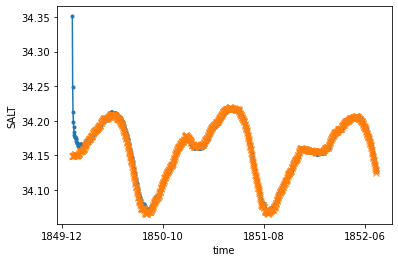

In [17]:
ds_sr.SSS.mean(['nlat', 'nlon']).plot(marker='.')

ds_data.SALT.mean(['nlat', 'nlon']).plot(marker='x', color='tab:orange')